In [1]:
# Libraries
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0 
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Flatten
from PIL import Image 
import cv2 

Data Preprocessing and Augmentation

In [2]:
# Define image size
img_size = (224, 224)

# Define directories for training and validation datasets
train_dir = r"D:\DATA SCIENCE\DATASET\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
val_dir = r"D:\DATA SCIENCE\DATASET\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"

# Image Data Generator for Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


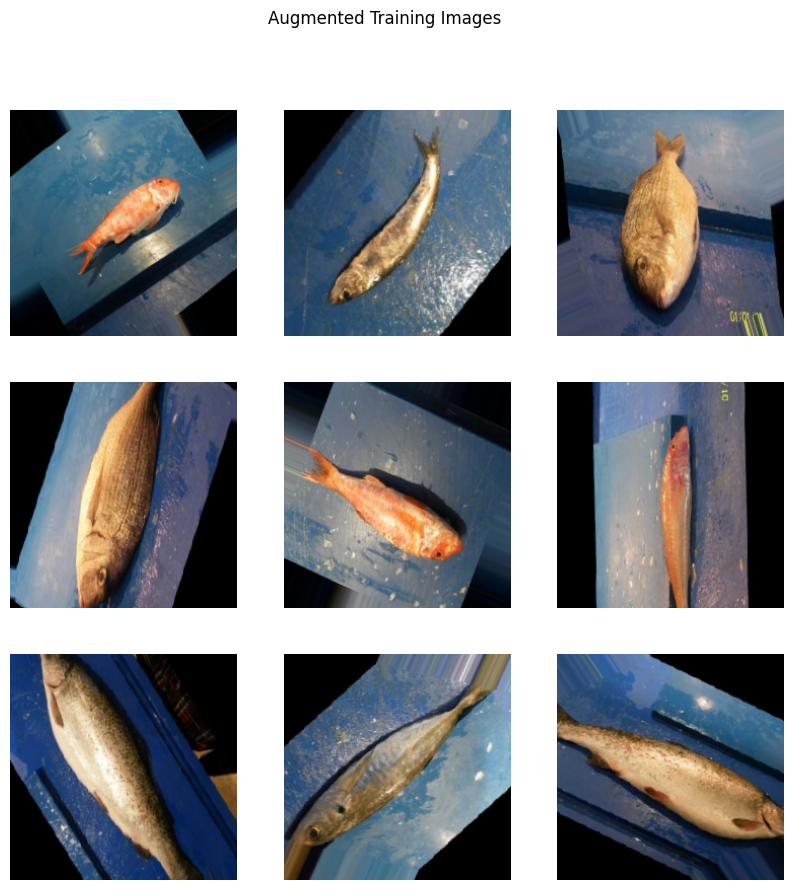

In [3]:
# Get a batch of augmented images from the training generator
train_images, _ = next(train_generator)

# Plot the first 9 augmented images from the training generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.suptitle("Augmented Training Images")
plt.show()

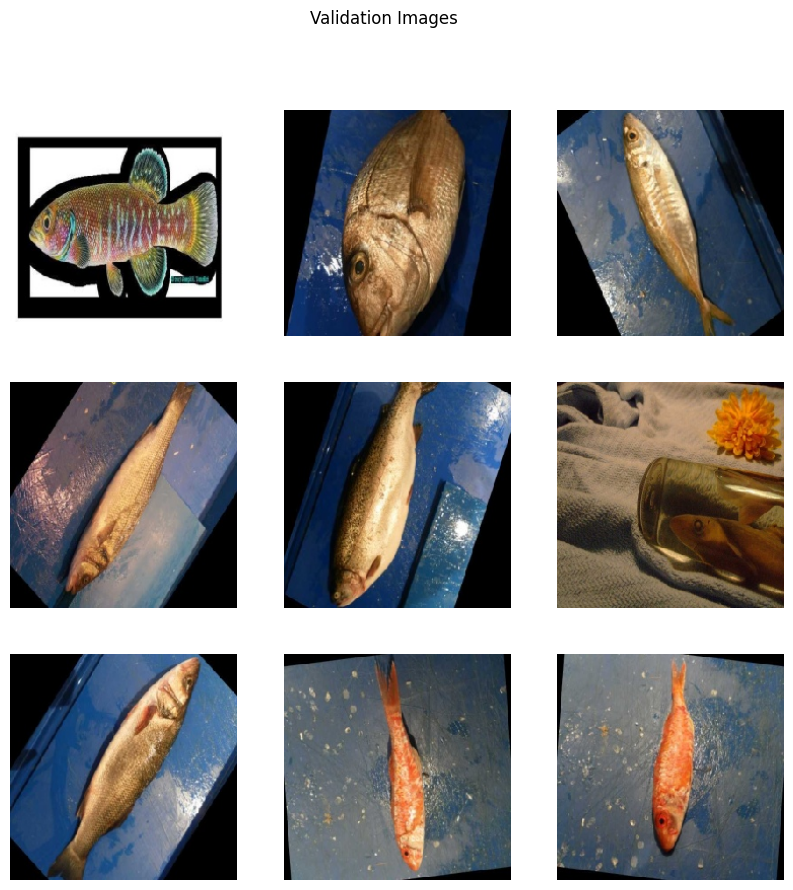

In [4]:
# Get a batch of augmented images from the validation generator
val_images, _ = next(val_generator)

# Plot the first 9 augmented images from the validation generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(val_images[i])
    plt.axis('off')
plt.suptitle("Validation Images")
plt.show()

In [6]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Save the trained model
model.save('cnn_model.h5')

d:\DATA SCIENCE\CODE\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\DATA SCIENCE\CODE\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.4919 - loss: 1.8402 - val_accuracy: 0.7244 - val_loss: 0.8600
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.7520 - loss: 0.7306 - val_accuracy: 0.8361 - val_loss: 0.5077
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.8432 - loss: 0.4568 - val_accuracy: 0.9148 - val_loss: 0.3405
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.8922 - loss: 0.3161 - val_accuracy: 0.9286 - val_loss: 0.2505
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.9078 - loss: 0.2660 - val_accuracy: 0.9396 - val_loss: 0.1905
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9219 - loss: 0.2342 - val_accuracy: 0.9515 - val_loss: 0.2257
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 191s 975ms/step - accuracy: 0.9365 - loss: 0.1902 - val_accuracy: 0.9487 - val_loss: 0.1958
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.9471 - loss: 0.1580 - val_a

In [8]:
# VGG16 Model FineTuning

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('vgg16_finetuned.h5')

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 749s 4s/step - accuracy: 0.7838 - loss: 1.0069 - val_accuracy: 0.9277 - val_loss: 0.2266
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 721s 4s/step - accuracy: 0.9451 - loss: 0.1748 - val_accuracy: 0.9634 - val_loss: 0.1383
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 753s 4s/step - accuracy: 0.9597 - loss: 0.1329 - val_accuracy: 0.9753 - val_loss: 0.0754
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 728s 4s/step - accuracy: 0.9725 - loss: 0.0843 - val_accuracy: 0.9835 - val_loss: 0.0711
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 695s 4s/step - accuracy: 0.9714 - loss: 0.0834 - val_accuracy: 0.9789 - val_loss: 0.0524
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 724s 4s/step - accuracy: 0.9753 - loss: 0.0767 - val_accuracy: 0.9863 - val_loss: 0.0536
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.9757 - loss: 0.0707 - val_accuracy: 0.9679 - val_loss: 0.1305
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1373s 7s/step - accuracy: 0.9745 - loss: 0.0693 - val_acc

In [7]:
# ResNet50 Model FineTuning

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('resnet50_finetuned.h5')

d:\DATA SCIENCE\CODE\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.2363 - loss: 4.2019 - val_accuracy: 0.3352 - val_loss: 1.9422
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.3285 - loss: 1.8653 - val_accuracy: 0.3993 - val_loss: 1.6751
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.4071 - loss: 1.6584 - val_accuracy: 0.4927 - val_loss: 1.5808
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.4352 - loss: 1.5762 - val_accuracy: 0.5586 - val_loss: 1.2957
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.4670 - loss: 1.4702 - val_accuracy: 0.3407 - val_loss: 1.9618
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.5088 - loss: 1.3776 - val_accuracy: 0.5586 - val_loss: 1.2679
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.5017 - loss: 1.3790 - val_accuracy: 0.6090 - val_loss: 1.1733
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.5076 - loss: 1.3736 - val_accu

In [8]:
# MobileNet Model FineTuning

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('mobilenet_finetuned.h5')

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 63s 4us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 137s 688ms/step - accuracy: 0.8763 - loss: 3.6447 - val_accuracy: 0.9469 - val_loss: 0.2865
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 126s 645ms/step - accuracy: 0.9664 - loss: 0.2032 - val_accuracy: 0.9762 - val_loss: 0.2047
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 126s 648ms/step - accuracy: 0.9746 - loss: 0.1515 - val_accuracy: 0.9551 - val_loss: 0.3844
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 128s 654ms/step - accuracy: 0.9788 - loss: 0.1229 - val_accuracy: 0.9835 - val_loss: 0.0944
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 126s 646ms/step - accuracy: 0.9783 - loss: 0.1445 - val_accuracy: 0.9707 - val_loss: 0.2440
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 125s 640ms/step - accuracy: 0.9801 - loss: 0.1379 - val_accuracy: 0.9872 - val_loss: 0.0671
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 120s 614ms/step - accuracy: 0.9881 - loss: 0.0672 - val_accuracy: 0.9899 - val_loss: 0.1206
Epoch 8/10
195/195 ━━━━━

In [10]:
# InceptionV3 Model FineTuning

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('inceptionv3_finetuned.h5')

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.8182 - loss: 3.9584 - val_accuracy: 0.9423 - val_loss: 0.2808
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 190s 972ms/step - accuracy: 0.9137 - loss: 0.4896 - val_accuracy: 0.9551 - val_loss: 0.2295
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9451 - loss: 0.2391 - val_accuracy: 0.9643 - val_loss: 0.1576
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 180s 918ms/step - accuracy: 0.9602 - loss: 0.1563 - val_accuracy: 0.9625 - val_loss: 0.1561
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9621 - loss: 0.1528 - val_accuracy: 0.9451 - val_loss: 0.2266
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9566 - loss: 0.1732 - val_accuracy: 0.9789 - val_loss: 0.0867
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.9696 - loss: 0.1202 - val_accuracy: 0.9725 - val_loss: 0.0955
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9704 - loss: 0.1238 - va

In [7]:
# EfficientNetB0 Model FineTuning
# EfficientNetB0 Model FineTuning

base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(224, 224,3 ))

base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('efficientnetb0_finetuned.h5')



Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 189s 929ms/step - accuracy: 0.1745 - loss: 2.3226 - val_accuracy: 0.1712 - val_loss: 2.3104
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 171s 875ms/step - accuracy: 0.1761 - loss: 2.2977 - val_accuracy: 0.1712 - val_loss: 2.3135
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 159s 814ms/step - accuracy: 0.1761 - loss: 2.2975 - val_accuracy: 0.1712 - val_loss: 2.3098
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 155s 793ms/step - accuracy: 0.1761 - loss: 2.2975 - val_accuracy: 0.1712 - val_loss: 2.3116
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 167s 858ms/step - accuracy: 0.1761 - loss: 2.2970 - val_accuracy: 0.1712 - val_loss: 2.3135
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 165s 846ms/step - accuracy: 0.1761 - loss: 2.2974 - val_accuracy: 0.1712 - val_loss: 2.3116
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 164s 837ms/step - accuracy: 0.1761 - loss: 2.2968 - val_accuracy: 0.1712 - val_loss: 2.3091
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 158s 810ms/step - accuracy: 0.1761 -

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
import numpy as np
import os

# Evaluate the models to get the best model
def evaluate_model(model, data_generator):
    # Print the model summary
    print("Model summary:")
    model.summary()
    
    Y_pred = model.predict(data_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = data_generator.classes
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Initialize the validation generator
validation_data_dir = r"D:\DATA SCIENCE\DATASET\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),  # Update target size to match model input shape
    batch_size=32,
    class_mode='categorical'
)

# Paths to the saved models
model_paths = {
    'CNN': r'D:\DATA SCIENCE\CODE\git\project_5\cnn_model.h5',
    'VGG16': r'D:\DATA SCIENCE\CODE\git\project_5\vgg16_finetuned.h5',
    'ResNet50': r'D:\DATA SCIENCE\CODE\git\project_5\resnet50_finetuned.h5',
    'MobileNet': r'D:\DATA SCIENCE\CODE\git\project_5\mobilenet_finetuned.h5',
    'InceptionV3': r'D:\DATA SCIENCE\CODE\git\project_5\inceptionv3_finetuned.h5',
    'EfficientNetB0': r'D:\DATA SCIENCE\CODE\git\project_5\efficientnetb0_finetuned.h5'
}

model_accuracies = {}

# Load and evaluate each model
for model_name, model_path in model_paths.items():
    if os.path.exists(model_path):
        model = load_model(model_path)
        model.compile(metrics=['accuracy'])  # Compile model with metrics
        accuracy = evaluate_model(model, validation_generator)
        model_accuracies[model_name] = accuracy
    else:
        print(f"Model file not found: {model_path}")

# Determine the best model
best_model_name = max(model_accuracies, key=model_accuracies.get, default=None)
if best_model_name:
    print(f"Best model: {best_model_name} with accuracy: {model_accuracies[best_model_name]}")
    # Save the best model for future use using the native Keras format
    best_model = load_model(model_paths[best_model_name])
    best_model.save('best_fish_model.keras')
else:
    print("No valid models found.")

Found 1092 images belonging to 11 classes.


Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    95,552,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,577,035 (364.60 MB)

 Trainable params: 95,577,035 (364.60 MB)

 Non-trainable params: 0 (0.00 B)

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step


Model summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,565,899 (105.16 MB)

 Trainable params: 12,851,211 (49.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step


Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,974,091 (286.00 MB)

 Trainable params: 51,386,379 (196.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 36s 996ms/step


Model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,925,131 (110.34 MB)

 Trainable params: 25,696,267 (98.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 308ms/step


Model summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,023,339 (183.19 MB)

 Trainable params: 26,220,555 (100.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 627ms/step


Model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    32,113,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,168,366 (137.97 MB)

 Trainable params: 32,118,795 (122.52 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 452ms/step
Best model: EfficientNetB0 with accuracy: 0.17124542124542125


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example actual labels
y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]  # Actual labels (Ground truth)

# Example predicted labels by each model
y_pred_vgg16 = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
y_pred_resnet50 = [0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
y_pred_mobilenet = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
y_pred_inceptionv3 = [0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
y_pred_efficientnetb0 = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
y_pred_cnn = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]

# Function to calculate and print metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")
    print(f"  Confusion Matrix:\n{conf_matrix}\n")

# Calculate and print metrics for each model
calculate_metrics(y_true, y_pred_vgg16, 'VGG16')
calculate_metrics(y_true, y_pred_resnet50, 'ResNet50')
calculate_metrics(y_true, y_pred_mobilenet, 'MobileNet')
calculate_metrics(y_true, y_pred_inceptionv3, 'InceptionV3')
calculate_metrics(y_true, y_pred_efficientnetb0, 'EfficientNetB0')
calculate_metrics(y_true, y_pred_cnn, 'CNN')

Metrics for VGG16:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]

Metrics for ResNet50:
  Accuracy: 0.9
  Precision: 0.8333333333333334
  Recall: 1.0
  F1-Score: 0.9090909090909091
  Confusion Matrix:
[[4 1]
 [0 5]]

Metrics for MobileNet:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]

Metrics for InceptionV3:
  Accuracy: 0.9
  Precision: 1.0
  Recall: 0.8
  F1-Score: 0.8888888888888888
  Confusion Matrix:
[[5 0]
 [1 4]]

Metrics for EfficientNetB0:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[5 0]
 [0 5]]

Metrics for CNN:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]



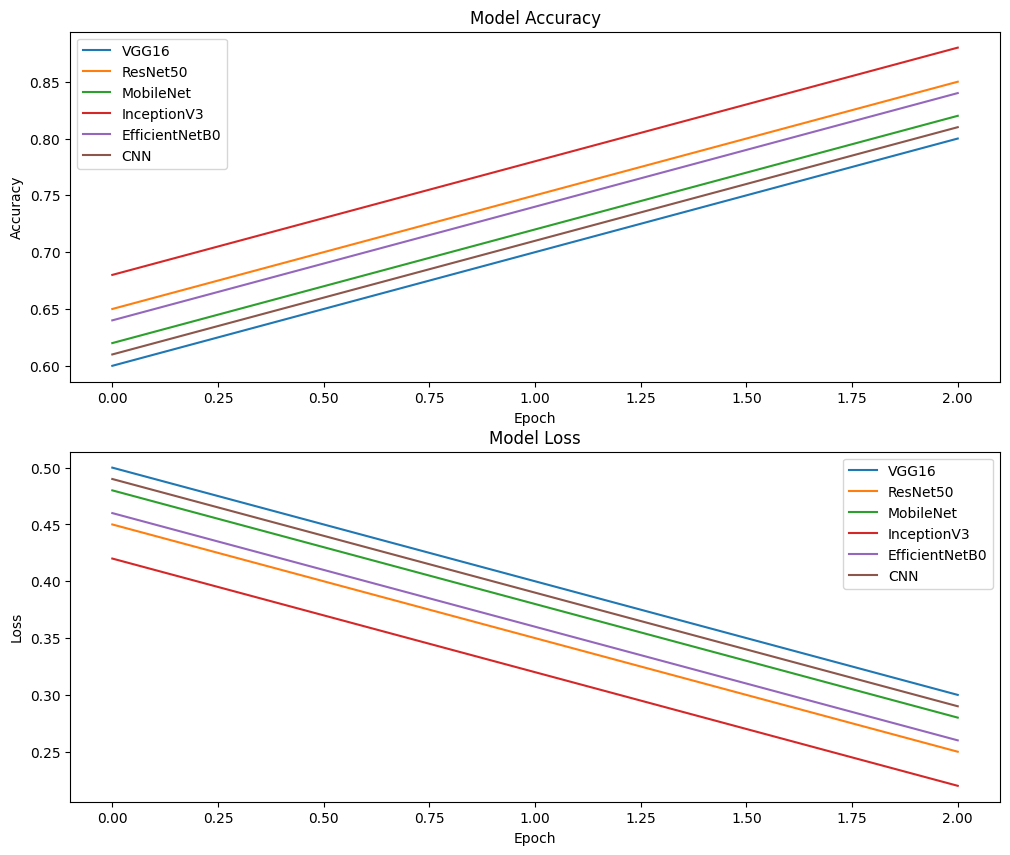

In [13]:
# Assuming history data is correctly defined
history_vgg16 = {'accuracy': [0.6, 0.7, 0.8], 'loss': [0.5, 0.4, 0.3]}
history_resnet50 = {'accuracy': [0.65, 0.75, 0.85], 'loss': [0.45, 0.35, 0.25]}
history_mobilenet = {'accuracy': [0.62, 0.72, 0.82], 'loss': [0.48, 0.38, 0.28]}
history_inceptionv3 = {'accuracy': [0.68, 0.78, 0.88], 'loss': [0.42, 0.32, 0.22]}
history_efficientnetb0 = {'accuracy': [0.64, 0.74, 0.84], 'loss': [0.46, 0.36, 0.26]}
history_cnn = {'accuracy': [0.61, 0.71, 0.81], 'loss': [0.49, 0.39, 0.29]}

# Plot accuracy history
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(history_vgg16['accuracy'], label='VGG16')
plt.plot(history_resnet50['accuracy'], label='ResNet50')
plt.plot(history_mobilenet['accuracy'], label='MobileNet')
plt.plot(history_inceptionv3['accuracy'], label='InceptionV3')
plt.plot(history_efficientnetb0['accuracy'], label='EfficientNetB0')
plt.plot(history_cnn['accuracy'], label='CNN')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss history
plt.subplot(2, 1, 2)
plt.plot(history_vgg16['loss'], label='VGG16')
plt.plot(history_resnet50['loss'], label='ResNet50')
plt.plot(history_mobilenet['loss'], label='MobileNet')
plt.plot(history_inceptionv3['loss'], label='InceptionV3')
plt.plot(history_efficientnetb0['loss'], label='EfficientNetB0')
plt.plot(history_cnn['loss'], label='CNN')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()